# Predicting ADHD diagnosis using machine learning 

## Downloading and exploring dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets

%matplotlib inline

In [2]:
#fetch data 
data = datasets.fetch_adhd()

In [3]:
#Data content
data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [4]:
#Data description 
data.description

".. _adhd_dataset:\n\nADHD dataset\n============\n\nAccess\n------\nSee :func:`nilearn.datasets.fetch_adhd`.\n\nNotes\n-----\nPart of the 1000 Functional Connectome Project. Phenotypic\ninformation includes: diagnostic status, dimensional ADHD symptom measures,\nage, sex, intelligence quotient (IQ) and lifetime medication status.\nPreliminary quality control assessments (usable vs. questionable) based upon\nvisual timeseries inspection are included for all :term:`resting-state` :term:`fMRI` scans.\n\nIncludes preprocessed data from 40 participants.\n\nProject was coordinated by Michael P. Milham.\n\nSee :footcite:t:`ADHDdataset`.\n\nContent\n-------\n    :'func': Nifti images of the :term:`resting-state` data\n    :'phenotypic': Explanations of preprocessing steps\n    :'confounds': CSV files containing the nuisance variables\n\nReferences\n----------\n\n.. footbibliography::\n\nFor more information about this dataset's structure:\nhttp://fcon_1000.projects.nitrc.org/indi/adhd200/index

In [5]:
#Download phenotypic file 
pheno_file = ('/Users/andrianarisoniangola/Downloads/allSubs_testSet_phenotypic_dx.csv')

pheno = pd.read_csv(pheno_file)

In [6]:
#See what phenotypic data is available 
print(pheno.columns)

Index(['Disclaimer', 'ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX',
       'Secondary Dx ', 'ADHD Measure', 'ADHD Index', 'Inattentive',
       'Hyper/Impulsive', 'Med Status', 'IQ Measure', 'Verbal IQ',
       'Performance IQ', 'Full2 IQ', 'Full4 IQ', 'QC_Rest_1', 'QC_Rest_2',
       'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2'],
      dtype='object')


In [7]:
#Get a look at what the pheno table look like 
pheno.head()

Disclaimer       ID  Site  Gender    Age Handedness DX Secondary Dx   \
0        NaN  1038415     1       1  14.92          1  3           ODD   
1        NaN  1201251     1       1  12.33          1  3           NaN   
2        NaN  1245758     1       0   8.58          1  0           NaN   
3        NaN  1253411     1       1   8.08          1  0           NaN   
4        NaN  1419103     1       0   9.92          1  0           NaN   

  ADHD Measure ADHD Index  ... Verbal IQ Performance IQ Full2 IQ  Full4 IQ  \
0            1         52  ...     109.0          103.0   -999.0     107.0   
1            1         49  ...     115.0          103.0   -999.0     110.0   
2            1         35  ...     121.0           88.0   -999.0     106.0   
3            1         35  ...     119.0          106.0   -999.0     114.0   
4            1         41  ...     124.0           76.0   -999.0     102.0   

   QC_Rest_1  QC_Rest_2  QC_Rest_3  QC_Rest_4  QC_Anatomical_1  \
0          1        NaN        NaN        NaN                1   
1          1        NaN        NaN        NaN                1   
2          1        NaN        NaN        NaN                1   
3          1        NaN        NaN        NaN                1   
4          1        NaN        NaN        NaN                1   

   QC_Anatomical_2  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 24 columns]

#### Exploring phenotypic data and looking at their relationship

In [8]:
print(pheno['Age'].describe())

count    197.000000
mean      12.214670
std        3.769128
min        7.260000
25%        9.320000
50%       11.280000
75%       14.530000
max       26.310000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

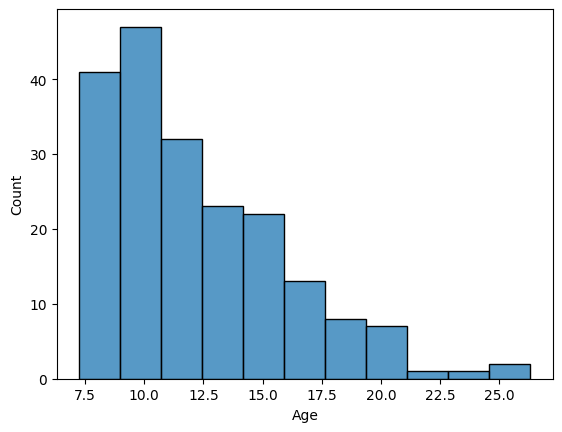

In [9]:
sns.histplot(pheno['Age'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

<Axes: xlabel='DX', ylabel='Count'>

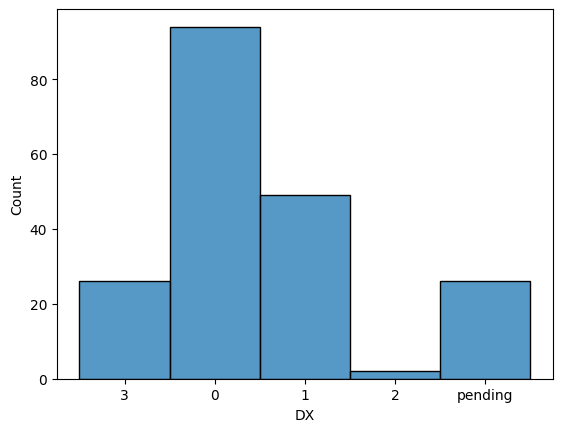

In [10]:
sns.histplot(pheno['DX'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

In [11]:
print(pheno['Performance IQ'].describe())

count    137.000000
mean     105.138686
std       14.273681
min       67.000000
25%       98.000000
50%      106.000000
75%      115.000000
max      143.000000
Name: Performance IQ, dtype: float64


<Axes: xlabel='Performance IQ', ylabel='Count'>

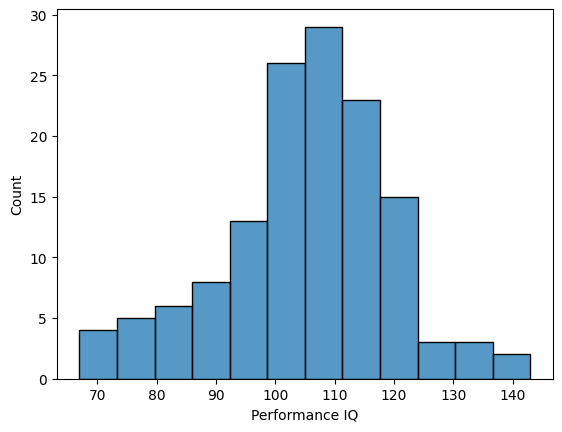

In [12]:
sns.histplot(pheno['Performance IQ'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

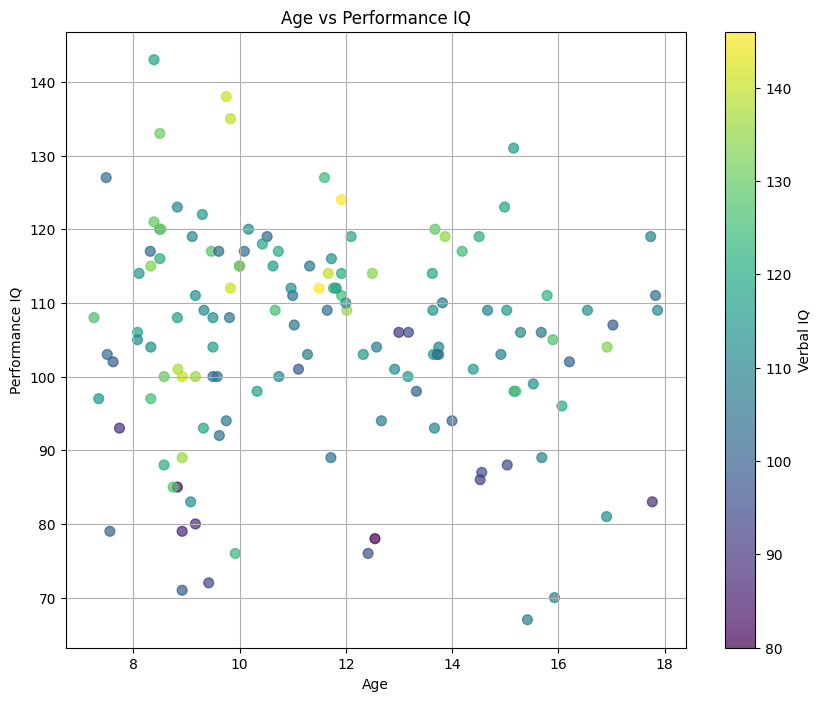

In [13]:
age = pheno['Age']
performance_iq = pheno['Performance IQ']
verbal_iq = pheno['Verbal IQ']

plt.figure(figsize=(10, 8))
plt.scatter(age, performance_iq, c=verbal_iq, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Verbal IQ')  # Add colorbar indicating Verbal IQ values
plt.title('Age vs Performance IQ')
plt.xlabel('Age')
plt.ylabel('Performance IQ')
plt.grid(True)
plt.show()


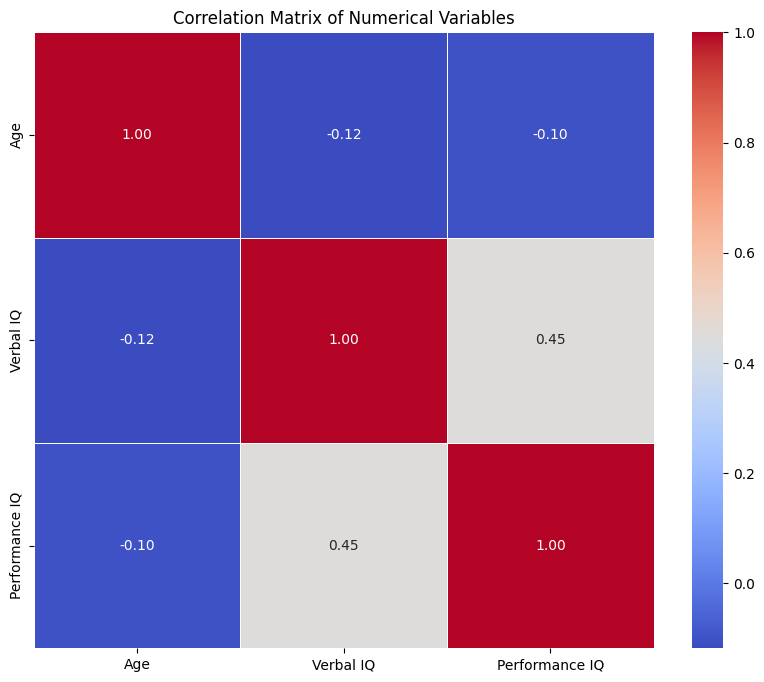

In [14]:
# Selecting only the numerical columns of interest
numerical_cols = ['Age', 'Verbal IQ', 'Performance IQ']
df_numeric = pheno[numerical_cols]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


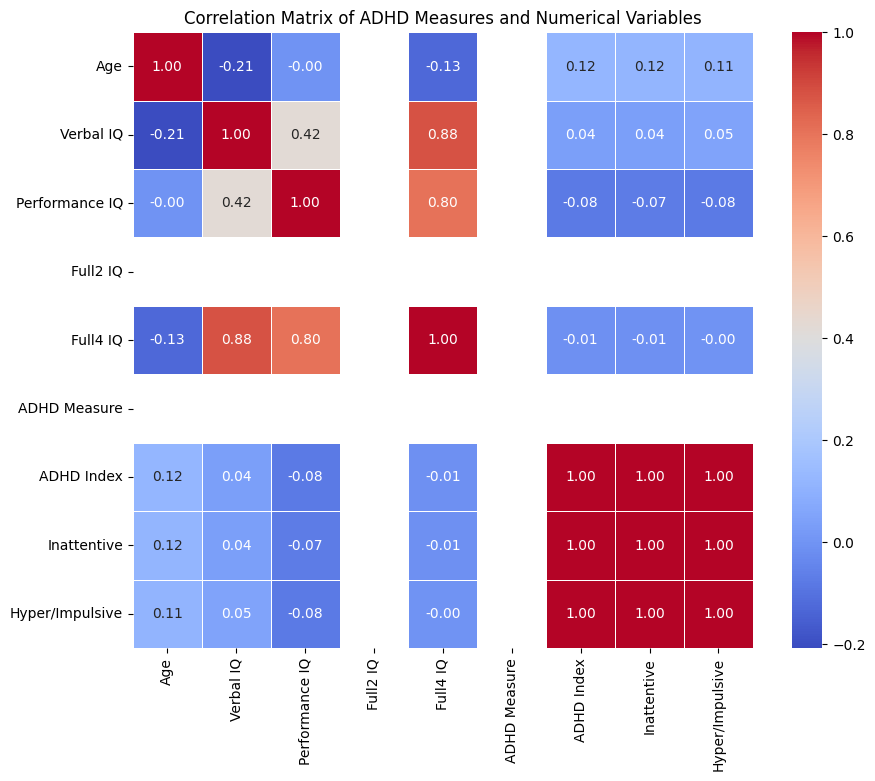

In [15]:
# Computing correlation matrix
adhd_cols = ['ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive']
numerical_cols = ['Age', 'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ']
df_numeric = pheno[numerical_cols + adhd_cols].apply(pd.to_numeric, errors='coerce').dropna()
correlation_matrix = df_numeric.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of ADHD Measures and Numerical Variables')
plt.show()



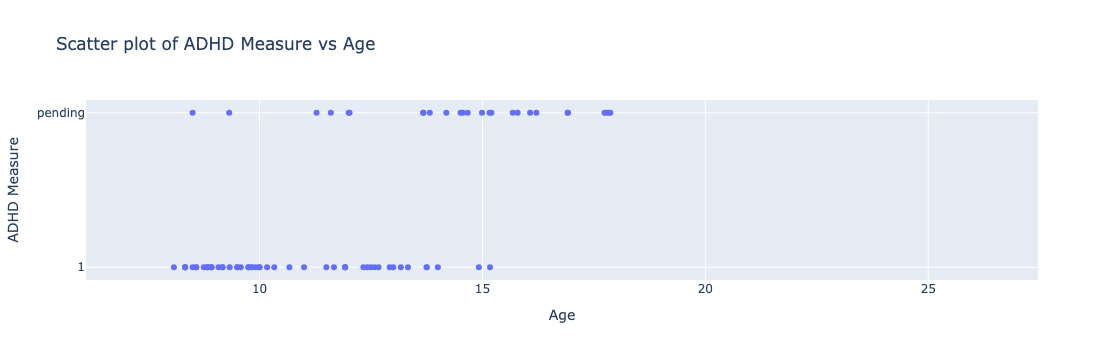

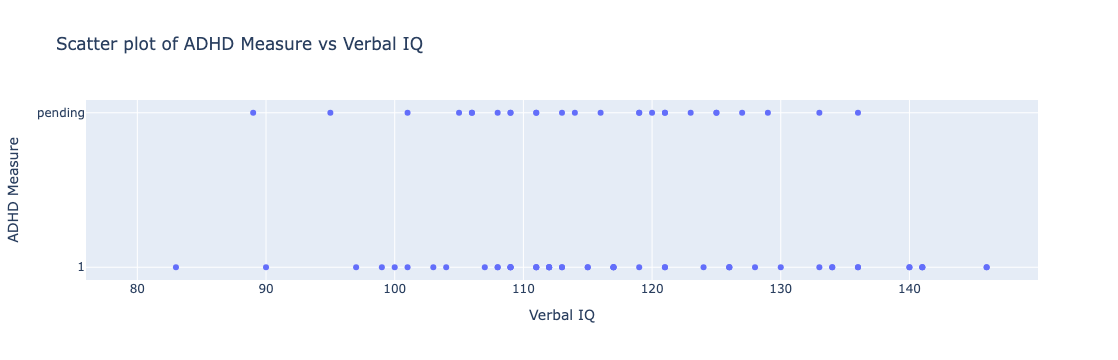

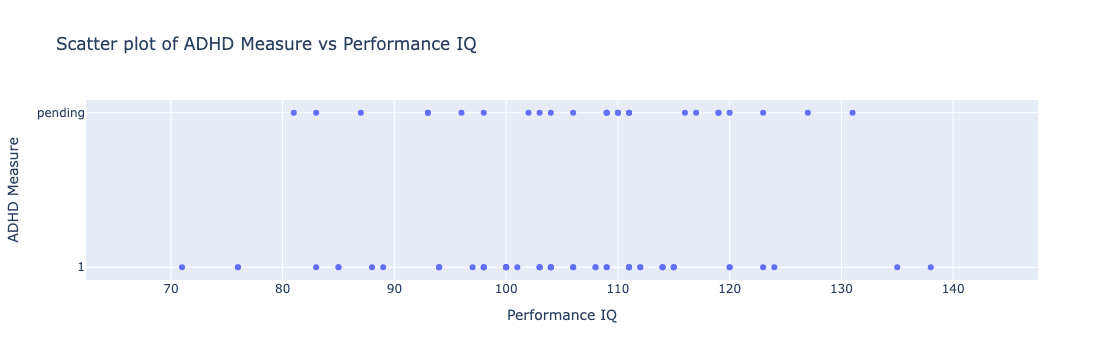

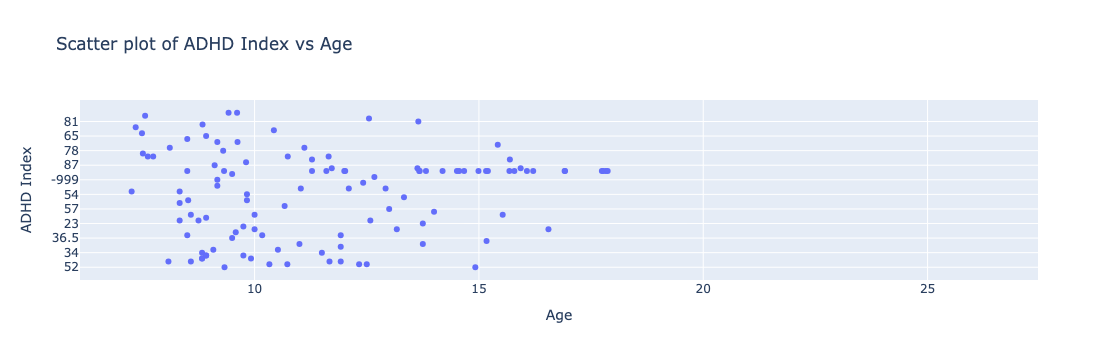

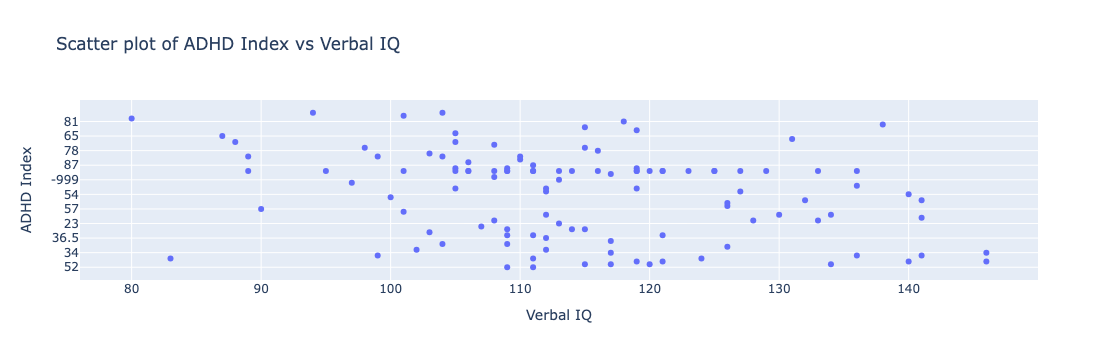

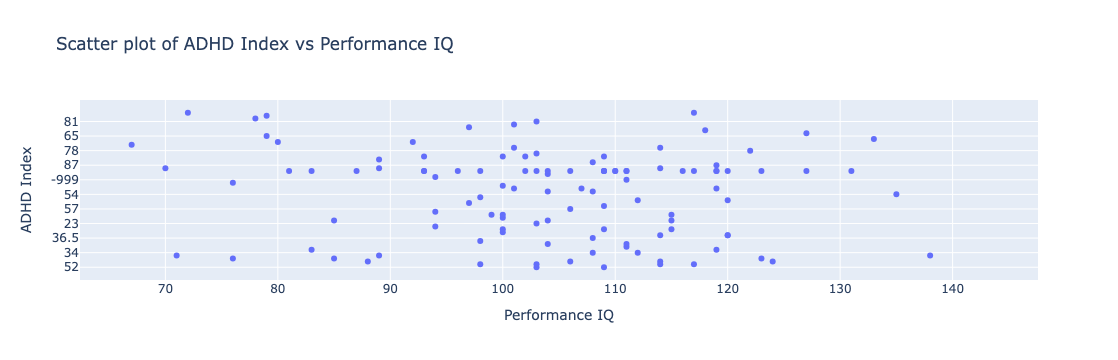

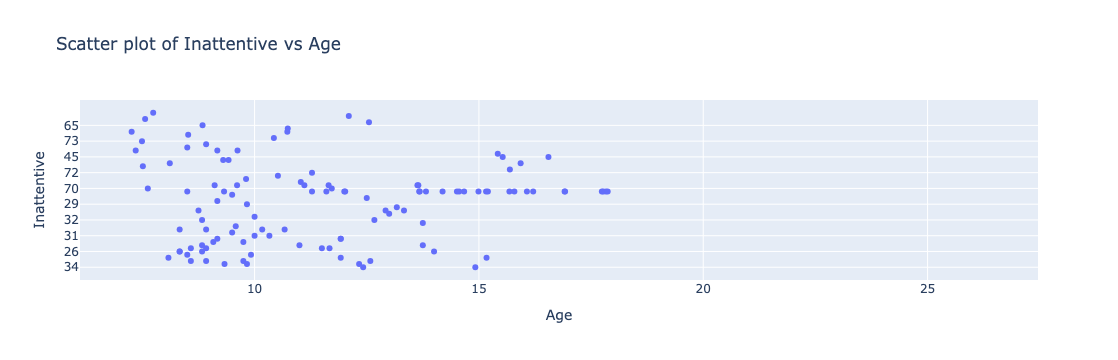

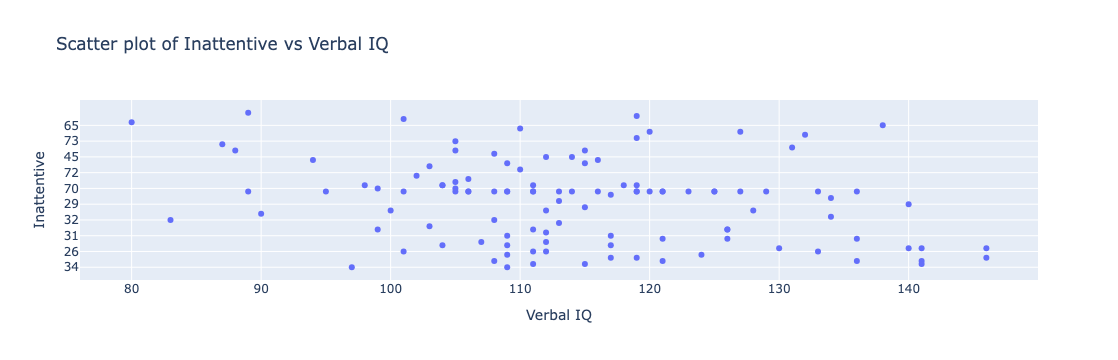

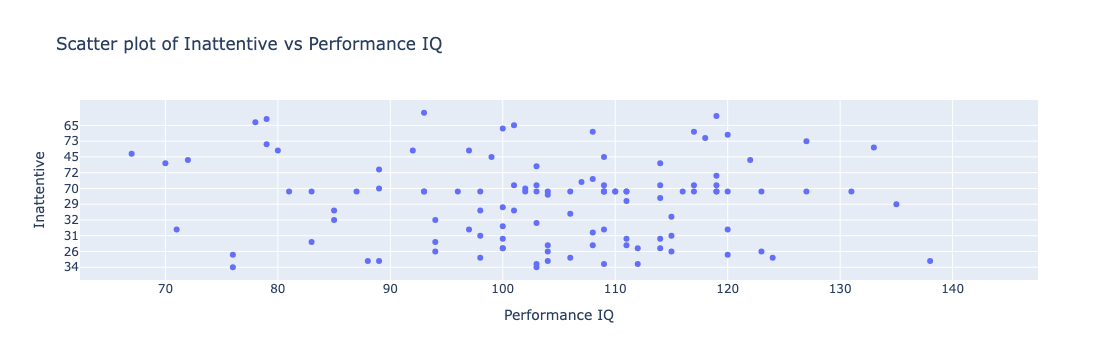

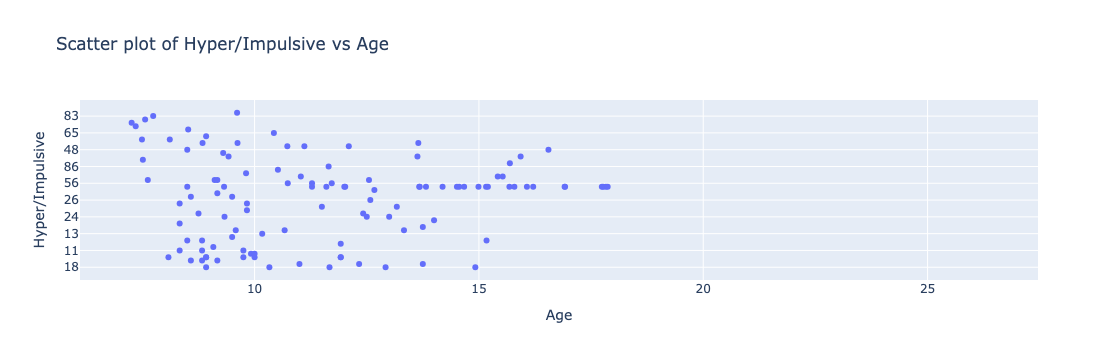

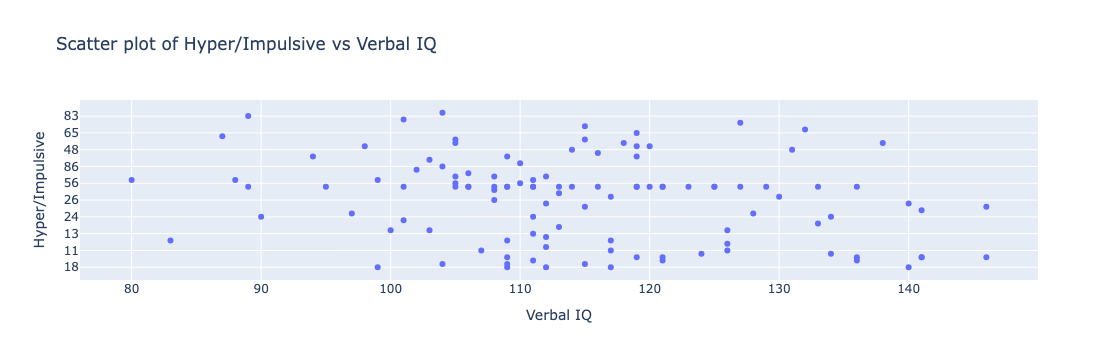

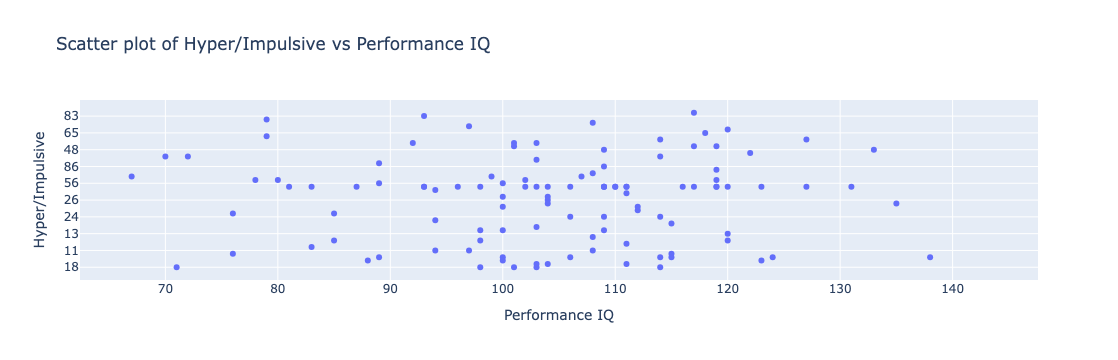

In [16]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'df'

# Selecting ADHD measures and other numerical variables
adhd_cols = ['ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive']
numerical_cols = ['Age', 'Verbal IQ', 'Performance IQ']

# Creating interactive scatter plots
for adhd_col in adhd_cols:
    for num_col in numerical_cols:
        fig = px.scatter(pheno, x=num_col, y=adhd_col, title=f'Scatter plot of {adhd_col} vs {num_col}')
        fig.show()


## Preparing data

In [17]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

#### Data labeling 

In [18]:
#import atlas
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

#### Feature extraction

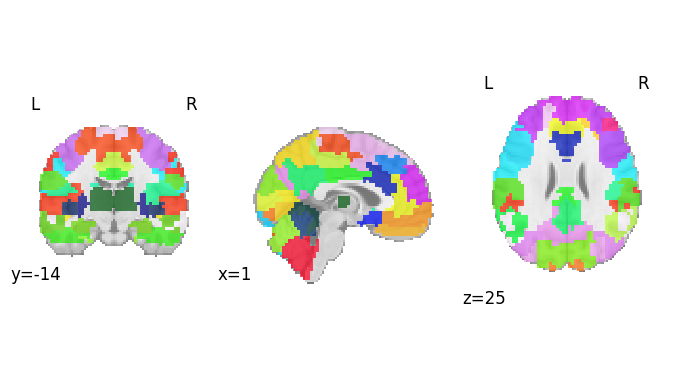

In [19]:
plotting.plot_roi(atlas_filename, draw_cross = False)

In [20]:
# create mask
mask = NiftiLabelsMasker(labels_img=atlas_filename, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

# initialize correlation measure
correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                         discard_diagonal=True)

In [21]:
import pandas as pd

# Initialize an empty list to store data
all_features_data = []

for i, sub in enumerate(data.func):
    # Extract the timeseries from the ROIs in the atlas
    time_series = mask.fit_transform(sub, confounds=data.confounds[i])
    # Create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    # Append features and file name to the list
    all_features_data.append({'features': correlation_matrix, 'file': data.func[i]})
    # Uncomment below to keep track of status
    # print('finished %s of %s'%(i+1, len(data.func)))

# Concatenate the list of dictionaries into a DataFrame
all_features = pd.concat([pd.DataFrame(d) for d in all_features_data], ignore_index=True)

# Print the DataFrame to verify
print(all_features)


[NiftiLabelsMasker.wrapped] loading data from /Users/andrianarisoniangola/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Resampling labels
[NiftiLabelsMasker.wrapped] loading data from /Users/andrianarisoniangola/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
[NiftiLabelsMasker.wrapped] loading data from /Users/andrianarisoniangola/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
[NiftiLabelsMasker.wrapped] loading data from /Users/andrianarisoniangola/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
[NiftiLabelsMasker.wrapped] loading data from /Users/andrianarisoniangola/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/templat

In [24]:
data_prep = new_data = pd.DataFrame()
data_prep['ID'] = pheno['ID']
data_prep['DX'] = pheno['DX'].apply(lambda x: 1 if x in ['1', '2', '3'] else x)
data_prep['features'] = all_features['features']
data_prep = data_prep[data_prep['DX'] != 'pending']

In [25]:
data_prep.head()

ID DX  features
0  1038415  1  0.385760
1  1201251  1  0.197529
2  1245758  0 -0.034570
3  1253411  0  0.261502
4  1419103  0  0.220692

## Classification

#### Data splitting 